In [24]:
# from gensim.corpora.dictionary import Dictionary
# from gensim.models.ldamodel import LdaModel

# import nltk

# NLTK Downloader required
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

import re
# from nltk.corpus import stopwords 
# from nltk.tokenize import RegexpTokenizer, word_tokenize, TweetTokenizer
# from nltk.stem import WordNetLemmatizer 
#remember to remove non-English characters

import pandas as pd
import numpy as np
#from matplotlib import pyplot as plt

import statistics
import math

from datetime import datetime
from time import mktime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler 

# import category_encoders as ce

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score

from joblib import dump
# add other imports if needed

In [25]:
df= pd.read_csv('heart_2020_cleaned.csv/heart_2020_cleaned.csv')
df


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [26]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [27]:
categorical = [var for var in df.columns if df[var].dtype == "O"]
# Applying one-hot encoding to each categorical column
label_encoder = LabelEncoder()

# Open a text file in write mode
with open('label_encoding_mapping.txt', 'w') as file:
    # Assuming 'categorical' is a list of your categorical column names
    for col in categorical:
        # Initialize the LabelEncoder for each column
        label_encoder = LabelEncoder()
        
        # Fit and transform the data for each column and create a new encoded column
        df[col + '_encoded'] = label_encoder.fit_transform(df[col])
        
        # Get the mapping from original categories to encoded values
        label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        
        # Write the mapping for the current column to the file
        file.write(f"Mapping for '{col}': {label_mapping}\n\n")
    
df = df.drop(categorical, axis = 1)

X = df.drop("HeartDisease_encoded", axis = 1)
y = df["HeartDisease_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
X

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_encoded,AlcoholDrinking_encoded,Stroke_encoded,DiffWalking_encoded,Sex_encoded,AgeCategory_encoded,Race_encoded,Diabetic_encoded,PhysicalActivity_encoded,GenHealth_encoded,Asthma_encoded,KidneyDisease_encoded,SkinCancer_encoded
0,16.60,3.0,30.0,5.0,1,0,0,0,0,7,5,2,1,4,1,0,1
1,20.34,0.0,0.0,7.0,0,0,1,0,0,12,5,0,1,4,0,0,0
2,26.58,20.0,30.0,8.0,1,0,0,0,1,9,5,2,1,1,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,11,5,0,0,2,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,1,0,4,5,0,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,0,0,1,1,8,3,2,0,1,1,0,0
319791,29.84,0.0,0.0,5.0,1,0,0,0,1,3,3,0,1,4,1,0,0
319792,24.24,0.0,0.0,6.0,0,0,0,0,0,5,3,0,1,2,0,0,0
319793,32.81,0.0,0.0,12.0,0,0,0,0,0,1,3,0,0,2,0,0,0


In [28]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

y_train.value_counts()

HeartDisease_encoded
0    204695
1    204695
Name: count, dtype: int64

In [29]:
scaler = MinMaxScaler()
cols = X_train.columns.tolist()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [30]:
# Instantiate the model
rforest = RandomForestClassifier(n_estimators = 20, random_state=42, max_depth= 6)

array([1.28764441e-03, 1.08630178e-04, 1.61556868e-02, 1.47126807e-01,
       1.08759301e-01, 7.38816506e-02, 5.59946270e-03, 4.34507066e-01,
       1.26337096e-02, 2.06096863e-02, 1.04042461e-03, 2.71329453e-02,
       4.27384336e-04, 2.44766755e-02, 1.18796587e-02, 1.07159987e-01,
       7.21327990e-03])

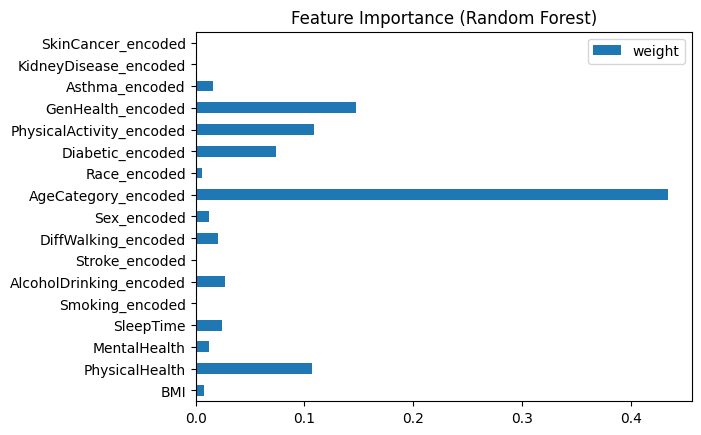

In [31]:
rforest.fit(X_train, np.ravel(y_train))

plotdfRF = pd.DataFrame(rforest.feature_importances_, index = X_train.columns, columns = ["weight"])
plotdfRF.plot.barh(title = "Feature Importance (Random Forest)")
rforest.feature_importances_[::-1]

In [32]:
scores = cross_val_score(rforest, X_train, np.ravel(y_train), cv=20)

y_probs = rforest.predict_proba(X_test)[:, 1]  # Get probability predictions for the positive class

# Define a custom threshold
threshold = 0.70  # This means you're more conservative about predicting the positive class

# Apply threshold to determine class predictions
y_pred_test = np.where(y_probs > threshold, 1, 0)


print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)

print(cm)

Model accuracy score: 0.8809
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     87727
           1       0.29      0.27      0.28      8212

    accuracy                           0.88     95939
   macro avg       0.61      0.61      0.61     95939
weighted avg       0.88      0.88      0.88     95939

[[82273  5454]
 [ 5973  2239]]


In [33]:
dump(rforest, 'rf_classifier.joblib')

['rf_classifier.joblib']